In [2]:
# Import important libraries 
import tensorflow as tf
import pandas as pd
from IPython.display import YouTubeVideo
import os
import pickle
import random

In [3]:
records_path = "./2/frame/train"

In [4]:
with open('filtered_rgb.pkl', 'rb') as f:
    loaded_rgb = pickle.load(f)

with open('filtered_audio.pkl', 'rb') as f:
    loaded_audio = pickle.load(f)

print('Filtered data features loaded successfully.')

Filtered data features loaded successfully.


In [5]:
with open('non_Commercial_Rgb.pkl', 'rb') as f:
    non_Commercial_Rgb = pickle.load(f)

with open('non_Commercial_Audio.pkl', 'rb') as f:
    non_Commercial_Audio = pickle.load(f)
 
print('Non-Commercial data features loaded successfully.')

Non-Commercial data features loaded successfully.


In [6]:
# Verifying the loading of features
print(f'Number of TV Advertisement RGB feature lists loaded: {len(loaded_rgb)}')
print(f'Number of TV Advertisement audio feature lists loaded: {len(loaded_audio)}')

Number of TV Advertisement RGB feature lists loaded: 2358
Number of TV Advertisement audio feature lists loaded: 2358


In [7]:
# Verifying the loading of features
print(f'Number of Non-TV RGB feature lists loaded: {len(non_Commercial_Rgb)}')
print(f'Number of Non-Tv audio feature lists loaded: {len(non_Commercial_Audio)}')

Number of Non-TV RGB feature lists loaded: 1000
Number of Non-Tv audio feature lists loaded: 1000


In [7]:
filtered_vid_ids = []           # This array stores the video IDs of Television Advertisement label extracted from the TFRecord file.
filtered_labels = []            # This array stores the label_ids associated with Television Advertisment label_id(315). The label ids are mapped to label names through vocabulary.csv which is discussed later.
filtered_rgb = loaded_rgb       # This array stores the RGB features of Television Advertisement label.
filtered_audio = loaded_audio   # This array stores the audio features of Television Advertisement label.

non_filtered_vid_ids = []       # This array stores the video IDs without the Television Advertisement label extracted from the TFRecord file.
non_filtered_labels = []        # This array stores the label_ids associated without Television Advertisment label_id(315). The label ids are mapped to label names through vocabulary.csv which is discussed later.
non_filtered_rgb = []           # This array stores the RGB features without the Television Advertisement label.
non_filtered_audio = []         # This array stores the audio features without the Television Advertisement label.

In [8]:
def decode_quantized_features(features):
    return tf.io.decode_raw(features, tf.uint8)

In [9]:
# List all .tfrecord files in the directory
tfrecord_files = [os.path.join(records_path, f) for f in os.listdir(records_path) if f.endswith('.tfrecord')]

# The specific labels for the non-filtered lists
specific_labels = {12, 329, 282, 52, 67, 92, 118, 653}

In [10]:
# Iterate over each .tfrecord file
counter = 0
for tfrecord_file in tfrecord_files:
    print(f'counter {counter}')
    counter+=1
    print(f'Processing file: {tfrecord_file}')
    # Iterate over each tfrecord in the TFRecord file
    try:
        for record in tf.compat.v1.python_io.tf_record_iterator(tfrecord_file):
            try:
                # Parse the SequenceExample from the binary record data
                seq_example = tf.train.SequenceExample.FromString(record)

                # Extract the video_id and labels
                vid_id = seq_example.context.feature['id'].bytes_list.value[0].decode('UTF-8')
                labels_list = seq_example.context.feature['labels'].int64_list.value

                # Check if the label ID 315 is in the labels list (label id 315 corresponds to Television Advertisement)
                if 315 in labels_list:
                    # Append video ID and labels to the filtered lists
                    filtered_vid_ids.append(vid_id)
                    filtered_labels.append(labels_list)

                    # Lists to store frame-level and audio-level features
                    rgb_features = []
                    audio_features = []

                    # Iterate over each frame-level feature pair (RGB and audio) in the SequenceExample
                    for rgb_feature, audio_feature in zip(seq_example.feature_lists.feature_list['rgb'].feature,
                                                          seq_example.feature_lists.feature_list['audio'].feature):
                        
                        # Decode the quantized RGB features and audio features
                        decoded_rgb = decode_quantized_features(rgb_feature.bytes_list.value[0])
                        decoded_audio = decode_quantized_features(audio_feature.bytes_list.value[0])

                        rgb_features.append(decoded_rgb)
                        audio_features.append(decoded_audio)

                    # Append frame-level lists to the main filtered lists
                    filtered_rgb.append(rgb_features)
                    filtered_audio.append(audio_features)
                else:
                    # Check if the labels list contains any of the specific labels
                    if any(label in specific_labels for label in labels_list):
                        # Append video ID and labels to the non-filtered lists
                        non_filtered_vid_ids.append(vid_id)
                        non_filtered_labels.append(labels_list)

                        # Lists to store frame-level and audio-level features
                        rgb_features = []
                        audio_features = []

                        # Iterate over each frame-level feature pair (RGB and audio) in the SequenceExample
                        for rgb_feature, audio_feature in zip(seq_example.feature_lists.feature_list['rgb'].feature,
                                                              seq_example.feature_lists.feature_list['audio'].feature):
                            
                            # Decode the quantized RGB features and audio features
                            decoded_rgb = decode_quantized_features(rgb_feature.bytes_list.value[0])
                            decoded_audio = decode_quantized_features(audio_feature.bytes_list.value[0])

                            rgb_features.append(decoded_rgb)
                            audio_features.append(decoded_audio)

                        # Append frame-level lists to the main non-filtered lists
                        non_filtered_rgb.append(rgb_features)
                        non_filtered_audio.append(audio_features)

            except tf.errors.DataLossError as e:
                print(f'Skipping corrupted record in file {tfrecord_file}: {e}')
    except tf.errors.DataLossError as e:
        print(f'Skipping entire file due to corruption: {tfrecord_file}: {e}')

# At this point, the following lists contain the relevant data:
# filtered_vid_ids, filtered_labels, filtered_rgb, and filtered_audio contain data for videos with the label "Television advertisement".
# non_filtered_vid_ids, non_filtered_labels, non_filtered_rgb, and non_filtered_audio contain data for videos with the specified labels.

counter 0
Processing file: ./2/frame/train/train0670.tfrecord
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
counter 1
Processing file: ./2/frame/train/train2511.tfrecord
counter 2
Processing file: ./2/frame/train/train0417.tfrecord
counter 3
Processing file: ./2/frame/train/train3170.tfrecord
counter 4
Processing file: ./2/frame/train/train2889.tfrecord
counter 5
Processing file: ./2/frame/train/train3139.tfrecord
counter 6
Processing file: ./2/frame/train/train0002.tfrecord
counter 7
Processing file: ./2/frame/train/train3565.tfrecord
counter 8
Processing file: ./2/frame/train/train0731.tfrecord
counter 9
Processing file: ./2/frame/train/train0730.tfrecord
counter 10
Processing file: ./2/frame/train/train0922.tfrecord
counter 11
Processing file: ./2/frame/train/train2386.tfrecord
counter 12
Processing file: ./2/frame/train/train0281.tfrecord
counter 13
Processing file: ./2/frame/train/train3328.tfrecord
counter 14
Processing file: ./2/frame/train

In [12]:
print('Number of videos in the new commercial dataset: ',len(filtered_vid_ids))
print ('Number of labels in the new commercial dataset: ', len (filtered_labels))
print('Length of visual features: ', len(filtered_rgb))
print('Length of audio features', len(filtered_audio))
print('Picking a youtube video id:',filtered_vid_ids[5])

Number of videos in the new commercial dataset:  474
Number of labels in the new commercial dataset:  474
Length of visual features:  2358
Length of audio features 2358
Picking a youtube video id: g65F


In [13]:
print('Number of videos in the new commercial dataset: ',len(non_filtered_vid_ids))
print ('Number of labels in the new commercial dataset: ', len (non_filtered_labels))
print('Length of visual features: ', len(non_filtered_rgb))
print('Length of audio features', len(non_filtered_audio))
print('Picking a youtube video id:',non_filtered_vid_ids[5])

Number of videos in the new commercial dataset:  21540
Number of labels in the new commercial dataset:  21540
Length of visual features:  21540
Length of audio features 21540
Picking a youtube video id: xFkY


In [14]:
print(filtered_vid_ids)

['9ROF', 'LrUL', 'AEYN', 'TcYN', 'oAYN', 'g65F', '665F', 'Yv5F', 'zrlX', '6WlX', 'sZo2', 'bb1Q', 'jD1Q', 'ervz', 'tDvz', 'gXvz', 'ed4r', 'RYjX', 'Y1jX', 'GcjX', 'NhjX', 'pdqj', 'f2qj', 'TK2m', 'Nx2m', 'tW2m', 'QOKx', 'xnjl', 'ZZjl', '5kjl', 'HDjl', '67Qe', 'TFrN', 'SwZH', 'RUZH', 'oJnY', 'xHnY', 'uNnY', 'riqQ', 'vhmD', 'qTit', 'unoX', 'nNDz', 'xdDz', 'vmTj', 'bpTj', '3bTj', 'ZdTj', 'CDrW', 'EkCd', 'mw3X', 'u0G3', 'SOG3', 'ODD4', 'nqCJ', '055N', 'a9Mt', '0YMt', 'f1ez', 'Jzez', 'Iwez', 'ArlT', 'AvWZ', '7Upn', 'fopn', 'wxpn', 'hVpn', 'lipn', 'D0im', 'Kbim', 'jg2S', 'Qe2S', 'gBtC', 'Z8tC', 'RpHg', 'secF', 'R9cF', 'sIKd', 'AWKd', 'burE', 'IGrE', 'aHrE', '9Qla', 'H5Yl', 'BVYl', 'oMPC', '3xPC', 'qvb8', 'EufI', 'euBZ', 'mcBZ', '7TXm', 'EGTQ', 'pvoH', '6SoH', 'ZioH', 'ZMoH', 'FYIQ', 'GzIQ', 'xza4', 'D8a4', '9aa4', '5Dvc', 'Zgig', '3b14', 'Hk7A', 'bInI', 'jgnI', 'o9VG', '04Il', 'BWeE', 's2eE', 'gt27', 'pVcK', 'yScK', 'kxe6', 'naER', 'lEEN', 'TZEN', 'OzEN', 'c0Lo', 'Jkce', 'p0ce', 'Xwce', 'LMmK',

In [15]:
print(non_filtered_vid_ids)

['eAkY', '0RkY', 'bpkY', 'uNkY', 'nAkY', 'xFkY', 'YtkY', 'sGkY', 'EikY', 'gtkY', 'vtkY', 'FWkY', 'XBkY', '2PkY', 'C8kY', 'mvkY', 'H9kY', 'TIkY', 'tskY', 'p0kY', 'HwkY', 'PgkY', 'vKkY', 'GQkY', 'HikY', 'eakY', 'jJkY', 'oskY', 's7kY', 'wdkY', 'QjkY', 'aKkY', 'gNkY', 'WTkY', 'a3kY', 'DrkY', 'dzkY', 'f8kY', 'fgkY', '2kkY', 'bZkY', 'igkY', 'yIkY', 'bukY', 'SykY', 'K3kY', 's0kY', 'zUkY', '3ykY', 'l7kY', 'xQkY', '67kY', 'U2kY', 'sJkY', 'i8kY', '5RkY', 'N7kY', 'VnkY', 'cdkY', 'GskY', 'STkY', '49kY', 'tbkY', 'NyOF', 'NjOF', 'CQOF', 'wQOF', 'tEOF', 'qsOF', 'udOF', 'XdOF', 'r0OF', 'MSOF', 'VnOF', '3TOF', 'qSOF', 'daOF', 'BtOF', 'P8OF', 'U6OF', 'erOF', 'EjOF', 'UcOF', 'bUOF', 'xyOF', 'T3OF', 'TqOF', 'hYOF', 'l1OF', 'lwOF', 'dhOF', 'c6OF', 'eGOF', 'BxOF', 'IdOF', '2VOF', 'jNOF', '8bOF', 'scOF', 'zGOF', 'SNOF', 'cCOF', 'bwOF', 'MsOF', 'BhOF', 'Q5OF', '9mOF', 'MjOF', '1JOF', '3uOF', 'GGOF', 'fFOF', 'r9OF', 'fmOF', '2OOF', 'tQOF', 'gROF', 'oYOF', 'YKOF', 'rFOF', 'XxOF', 'AGgT', 'b6gT', 'bZgT', 'L7gT',

- The video id wZ6U maps to wyHcL23Jvzs.

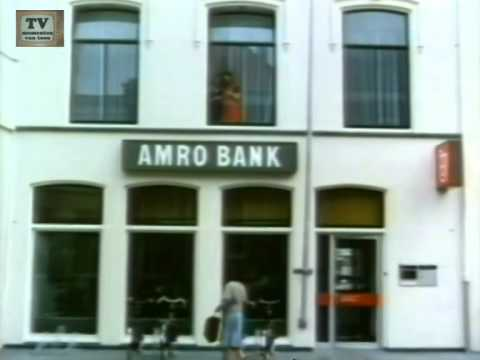

In [15]:
YouTubeVideo('DwnHaKYXbo0')

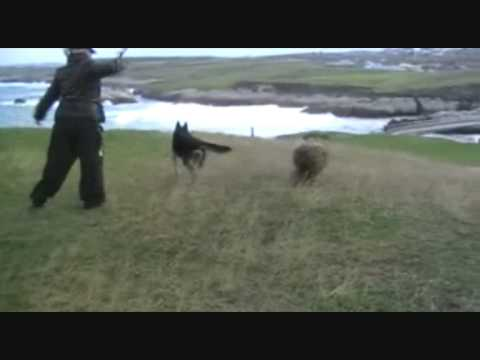

In [17]:
YouTubeVideo('XoxB1IPkG5Q')

In [16]:
# Randomly select 400 consistent pairs of RGB and audio features
if len(non_filtered_rgb) >= 500:
    selected_indices = random.sample(range(len(non_filtered_rgb)), 500)
    print(selected_indices)
    selected_rgb = [non_filtered_rgb[i] for i in selected_indices]
    selected_audio = [non_filtered_audio[i] for i in selected_indices]
else:
    print("Not enough non-filtered data to select 400 samples")

# Now selected_rgb and selected_audio contain 400 consistent random pairs of RGB and audio features
non_Commercial_Rgb+=(selected_rgb)
non_Commercial_Audio+=(selected_audio)

[13845, 12287, 2193, 4740, 14375, 15820, 879, 9470, 8599, 19373, 8808, 3136, 17673, 15128, 13893, 15094, 20474, 15118, 8841, 7329, 969, 9803, 528, 20464, 19845, 15292, 18697, 15761, 12337, 18706, 6525, 1352, 17816, 20314, 11181, 6495, 18765, 13106, 11500, 6746, 19641, 2279, 16444, 7071, 15927, 17458, 5092, 16502, 5006, 7181, 19970, 14966, 13302, 11853, 948, 14641, 3112, 2057, 18557, 19484, 19605, 21056, 11579, 1164, 5629, 11560, 15815, 15029, 21267, 805, 7709, 7103, 13530, 20529, 10048, 8686, 11286, 9402, 12325, 6024, 2950, 8559, 11497, 18822, 10404, 12539, 13791, 6110, 18978, 13954, 925, 8349, 2028, 8551, 14853, 14178, 4207, 15003, 2303, 5762, 15035, 11827, 8075, 4426, 4500, 18246, 2941, 645, 3861, 10888, 16434, 14576, 856, 10124, 17570, 9172, 18276, 10352, 13105, 16352, 3977, 18985, 14912, 9684, 1040, 14149, 4247, 5222, 9691, 19861, 7192, 5499, 9782, 16032, 8750, 6405, 7472, 3488, 20803, 15837, 20295, 4763, 2976, 19492, 7223, 12573, 3118, 5022, 4320, 11740, 7962, 8739, 8956, 17530, 5

In [17]:
# The filtered audio-visual features of Television Advertisement is saved 
with open('filtered_rgb.pkl', 'wb') as f:
    pickle.dump(filtered_rgb, f)

with open('filtered_audio.pkl', 'wb') as f:
    pickle.dump(filtered_audio, f)

print('Filtered data features saved successfully.')

Filtered data features saved successfully.


In [18]:
print(len(non_Commercial_Rgb))
print(len(non_Commercial_Audio))

1000
1000


In [19]:
# The Non-Commercial audio-visual features of Television Advertisement is saved 
with open('non_Commercial_Rgb.pkl', 'wb') as f:
    pickle.dump(non_Commercial_Rgb, f)

with open('non_Commercial_Audio.pkl', 'wb') as f:
    pickle.dump(non_Commercial_Audio, f)

print('Non-Commercial data features saved successfully.')

Non-Commercial data features saved successfully.
